<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Primeiro-Passo:-Armazenamento" data-toc-modified-id="Primeiro-Passo:-Armazenamento-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Primeiro Passo: Armazenamento</a></span><ul class="toc-item"><li><span><a href="#Virtual-Private-Cloud" data-toc-modified-id="Virtual-Private-Cloud-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Virtual Private Cloud</a></span></li><li><span><a href="#Sub-redes" data-toc-modified-id="Sub-redes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Sub-redes</a></span></li><li><span><a href="#Internet-Gateway" data-toc-modified-id="Internet-Gateway-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Internet Gateway</a></span></li><li><span><a href="#Tabelas-de-Roteamento" data-toc-modified-id="Tabelas-de-Roteamento-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Tabelas de Roteamento</a></span></li><li><span><a href="#Instância-RDS" data-toc-modified-id="Instância-RDS-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Instância RDS</a></span></li></ul></li><li><span><a href="#Segundo-Passo:-EC2" data-toc-modified-id="Segundo-Passo:-EC2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Segundo Passo: EC2</a></span><ul class="toc-item"><li><span><a href="#Grupos-de-Segurança" data-toc-modified-id="Grupos-de-Segurança-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Grupos de Segurança</a></span></li><li><span><a href="#Inicializando-Instâncias" data-toc-modified-id="Inicializando-Instâncias-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Inicializando Instâncias</a></span></li><li><span><a href="#Instalando-e-Configurando-Git" data-toc-modified-id="Instalando-e-Configurando-Git-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Instalando e Configurando Git</a></span></li><li><span><a href="#Conectando-com-VS-Code" data-toc-modified-id="Conectando-com-VS-Code-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Conectando com VS Code</a></span></li></ul></li><li><span><a href="#Terceiro-Passo:-Conectando-ao-BD" data-toc-modified-id="Terceiro-Passo:-Conectando-ao-BD-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Terceiro Passo: Conectando ao BD</a></span><ul class="toc-item"><li><span><a href="#Banco-de-Dados-Local" data-toc-modified-id="Banco-de-Dados-Local-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Banco de Dados Local</a></span><ul class="toc-item"><li><span><a href="#Acesso-via-Interface-de-Gerenciamento" data-toc-modified-id="Acesso-via-Interface-de-Gerenciamento-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Acesso via Interface de Gerenciamento</a></span></li><li><span><a href="#Acesso-via-Python" data-toc-modified-id="Acesso-via-Python-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Acesso via Python</a></span><ul class="toc-item"><li><span><a href="#Construções-de-Strings" data-toc-modified-id="Construções-de-Strings-3.1.2.1"><span class="toc-item-num">3.1.2.1&nbsp;&nbsp;</span>Construções de Strings</a></span></li><li><span><a href="#Otimizando-Processamento" data-toc-modified-id="Otimizando-Processamento-3.1.2.2"><span class="toc-item-num">3.1.2.2&nbsp;&nbsp;</span>Otimizando Processamento</a></span></li></ul></li></ul></li></ul></li></ul></div>

Entre algumas evoluções obtidas em um rico processo de construção e documentação do projeto _NBAFlow_, este notebook possui, como ponta de partida, o resultado obtido a partir da primeira entrega do [Painel de Estatísticas de Jogadores](https://public.tableau.com/app/profile/thiago.henrique.gomes.panini/viz/NBAFlow-InsightsdeDadosdaNBA/PaineldeEstatsticasdeJogadores) já publicado no [Tableau Public](https://public.tableau.com/s/). Dentro deste primeiro produto entregue, é possível consolidar o fluxo dos dados a partir do seguinte diagrama:

<div align="center">
    <br><img src="https://i.imgur.com/HMfAMMV.jpg" alt="nbaflow-c4">
</div>

Em resumo, o painel analítico construído e publicado no Tableau é gerado a partir de uma fonte de dados, concebida em formato csv e armazenada localmente, cuja construção tem, como base, o processamento de scripts Python capazes de consumir _endpoints_ presentes na biblioteca `nba_api`. Neste primeiro momento, a solução adotada atendia perfeitamente os requisitos estabelecidos, permitindo assim uma rápida construção de um produto relevante.

Em sequência ao desenvolvimento inicial proposto, o objetivo deste notebook é dar início aos passos necessários a serem concebidos visando um aprimoramento na arquitetura existente, abrindo margem para armazenamento e processamento dos dados em nuvem através da [AWS](https://aws.amazon.com/pt/). Conceitos e serviços como VPC, subredes, RDS, EC2, S3, SNS, entre outros, podem eventualmente serem abordados neste material. O intuito é explorar algumas possibilidades previamente estabelecidas e, ao longo do desenvolvimento, mapear novas ideias que possam surgir.

___
**_Para entender todo o contexto do projeto, é sugerido o consumo dos seguintes materiais:_**

* [1. NBAFlow - documentação e exploração inicial da API nba_api](https://github.com/ThiagoPanini/nbaflow/blob/main/notebooks/NBAflow-doc-api.ipynb)

* [2. NBAFlow - documentação de fluxo de extração de imagens de jogadores](https://github.com/ThiagoPanini/nbaflow/blob/main/notebooks/NBAflow-players-images.ipynb)

* [3. NBAFlow - estruturação de armazenamento em banco de dados Postgres (OPCIONAL)](https://github.com/ThiagoPanini/nbaflow/blob/main/notebooks/NBAflow-psql.ipynb)

* [4. Classes estruturadas de processamento de dados](https://github.com/ThiagoPanini/nbaflow/tree/main/core)

* [5. Scripts de processamento de dados utilizando as classes estruturadas](https://github.com/ThiagoPanini/nbaflow/tree/main/scripts)
___

# Primeiro Passo: Armazenamento

Como mencionado anteriormente, a primeira solução do _dashboard analítico_ do projeto NBAFlow tem, como fonte de dados, um arquivo `.csv` gerado a partir da execução de scripts Python consturídos justamentepara este fim. Como uma primeira tentativa de contato com serviços da AWS, é possível analisar as possibilidades de armazenar estes dados em um serviço de banco de dados na nuvem. Dentro da construção do arquivo e, considerando seu conteúdo, o serviço da AWS que mais se enquadra neste cenário é o banco de dados relacional [RDS](https://aws.amazon.com/pt/rds/) (do inglês, _Relational Database Service_). Da página oficial do serviço, temos:

> _O Amazon Relational Database Service (Amazon RDS) facilita a configuração, a operação e a escalabilidade de bancos de dados relacionais na nuvem. O serviço oferece capacidade econômica e redimensionável e automatiza tarefas demoradas de administração, como provisionamento de hardware, configuração de bancos de dados, aplicação de patches e backups. Dessa forma, você pode se concentrar na performance rápida, alta disponibilidade, segurança e conformidade que os aplicativos precisam._
_O Amazon RDS está disponível em vários tipos de instância de banco de dados – com otimização para memória, performance ou E/S – e oferece seis mecanismos de bancos de dados comuns, incluindo Amazon Aurora, PostgreSQL, MySQL, MariaDB, Oracle Database e SQL Server. Você pode usar o AWS Database Migration Service para migrar ou replicar facilmente bancos de dados existentes para o Amazon RDS._

Como uma forma estrutural de propor a construção e a implantação de serviços da AWS em um ambiente isolado capaz de fornecer toda a suite de conectividade exigida pelo projeto, os próximos passos dessa seção de armazenamento serão pautados pela organização de redes e grupos de acessos pertinentes à proposta em questão. Assim, criações de novas [VPCs](https://aws.amazon.com/pt/vpc/) (do inglês, _Virtual Private Cloud_), sub-redes e grupos de segurança serão exemplificados como forma de garantir a estrutura do projeto

## Virtual Private Cloud

Da página do serviço, disponibilizada pela própria AWS, temos:

>_A Amazon Virtual Private Cloud (Amazon VPC) é um serviço que permite iniciar recursos da AWS em uma rede virtual isolada logicamente definida por você. Você tem controle total sobre seu ambiente de redes virtuais, incluindo a seleção do seu próprio intervalo de endereços IP, a criação de sub-redes e a configuração de tabelas de rotas e gateways de rede. Você pode usar IPv4 e IPv6 para a maioria dos recursos em sua nuvem privada virtual, garantindo acesso fácil e seguro a recursos e aplicações._
_Como um dos serviços básicos da AWS, o Amazon VPC facilita a personalização da configuração de rede da VPC. Você pode criar uma sub-rede voltada ao público para seus servidores Web que têm acesso à Internet. Também é possível colocar seus sistemas back-end, como bancos de dados ou servidores de aplicações, em uma sub-rede privada, sem acesso à Internet. Com o Amazon VPC, você pode usar várias camadas de segurança, incluindo grupos de segurança e listas de controle de acesso à rede, para ajudar a controlar o acesso às instâncias do Amazon EC2 em cada sub-rede._

Assim, dentro do objetivo simplório em criar um banco de dados relacional na nuvem capaz de armazenar os dados de jogadores da NBA obtidos a partir da biblioteca `nba_api`, criar uma rede isolada de recursos da provedora cloud é um passo importante para a implantação de recursos e a manutenção da organização de acessos entre os serviços e a internet pública.

Por padrão, a AWS fornece uma VPC já com um bloco [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing) (do inglês, _Classeless Inter-Domain Route)_ associado. No exemplo abaixo, a VPC padrão `vpc-ea4ab68c` pode ser vista em detalhes, incluindo um parâmetro extremamente importante dentro do entendimento da conectividade interna e externa dos dispositivos internos dessa rede: o bloco de IPs CIDR. Na imagem, a partir do endereço `172.31.0.0/16`, associado ao bloco CIDR da VPC, é possível extrair, por exemplo, informações como:

* Trata-se de um endereço de IP da classe B
    - Primeiro octeto iniciado por 172 está entre 128 e 191, determinando assim o pertencimento à classe B
    - Por ser de classe B, existem $2^{16}=65536$ possibilidades de conexão (redes, hosts e broadcasts)
    - Máscara de sub-rede equivalente a 255.255.0.0 (característica de IPs da classe B)
* A notação CIDR indica que existem diferentes sub-redes 
    - O número 16, após a barra "/", indica que são utilizados 16 bits "1s" na máscara de sub-rede atrelada
    - Transformando em binário, temos que a máscara equivale aos octetos: 11111111.11111111.00000000.00000000
    - Após essa confirmação, de fato, a máscara de sub-rede equivale a 255.255.0.0, mantendo assim as 65536 possibilidades de conexão

<div align="center">
    <br><img src="https://i.imgur.com/dCobYeO.png" alt="aws-defaultvpc">
</div>

Após esse entendimento inicial, será proposta a criação de uma nova VPC para alocação dos recursos de novos projetos dentro da AWS. Considerando um cenário exploratório, essa nova VPC será construída com base em estudos de endereçamento de modo a propor uma arquitetura enxuta e organizada dos recursos nela alocados. Assim, a figura abaixo ilustra a `vpc-dev` dentro de um bloco CIDR definido pela máscara `192.168.0.0/16`, indicando assim um endereço de máscara definido por `255.255.0.0` ou, em binário, `11111111.11111111.00000000.00000000`.

<div align="center">
    <br><img src="https://i.imgur.com/9MOONa6.png" alt="aws-defaultvpc">
</div>

Com isso, é possível seguir na construção da estrutura de rede para a implantação do projeto de acordo com diretrizes organizacionais e boas práticas de utilização de endereçamento. No próximo tópico, será proposto um entendimento inicial e a criação de algumas sub-redes, públicas e privadas, em diferentes zonas de disponibilidade da AWS. Para cada sub-rede, será estabelecido um bloco CIDR de acordo com a capacidade de alocação de dispositivos definida.

## Sub-redes

Observando o bloco CIDR definido para a VPC recém criada (`192.168.0.0/16`), é possível criada tem a capacidade, por si só, de alocar $2^{16}=65534$ conexões (reserva de 1 endereço de rede e 1 endereço de broadcast). Nesse formato, iniciou-se então estudos para a criação de diferentes sub-redes dentro da VPC criada. Visando obter um maior entendimento sobre o endereçamento de redes e a alocação de recursos, foram definidos blocos CIDR variados para as sub-redes criadas em diferentes zonas de disponibilidade. A imagem abaixo traz todas as sub-redes criadas.

<div align="center">
    <br><img src="https://i.imgur.com/ZO4rS1C.png" alt="aws-subnets">
</div>

Observando a imagem acima, é possível destacar o endereçamento de cada bloco CIDR definido para cada sub-rede do projeto. Estrategicamente, as sub-redes foram criadas utilizando uma máscara de sub-rede definida pela sufixo `/24` (`11111111.11111111.11111111.00000000` em binário ou `255.255.255.0` em decimal) e, neste cenário, alterou-se apenas o terceiro octeto como uma fórma de representar o "índice" da sub-rede, facilitando assim a organização e o gerenciamento do endereçamento proposto. Ao fim do processo, definiu-se a criação de sub-redes com seus respectivos endereçamentos definidos por `192.168.X.0/24`, onde X pode ser um número qualquer entre 0 e 255. Dentro da proposta de criação de um espaço de alocação de IPs, público e privado, para duas zonas de disponibilidades diferentes, as sub-redes criadas foram:

    - 192.168.1.0/24
    - 192.168.2.0/24
    - 192.168.3.0/24
    - 192.168.4.0/24

Observando as máscaras definidas para cada sub-rede, percebe-se que o último octeto é o único que varia dentro do intervalo de endereços de IPs possíveis. Sendo assim, cada bloco possui a capacidade para 254 endereços (já retirando o próprio endereço de rede e o broadcast). Na imagem referenciada acima, é possível notar a capacidade para 251 endereços de IPs (a AWS provavelmente reserva mais alguns endereços para outros fins).

Por fim, é este tópico encerra-se com o desenho do diagrama de soluções obtido até o momento, ao qual pode ser visualizado a partir da figura abaixo gerada pelo [draw.io](https://app.diagrams.net/):

<div align="center">
    <br><img src="https://i.imgur.com/liKM1SX.png" alt="aws-diagram-v0">
</div>

Após um entendimento prévio sobre os blocos fundamentais de construção relacionados à etapas de redes, é preciso definir algumas questões voltadas a como tais blocos se relacionam entrem si e através da internet. 

## Internet Gateway

Em um primeiro momento, com o intuito de providenciar conectividade dos recursos implantados nas camadas de rede definidas pela VPC e as sub-redes nela inseridas, é preciso criar um componente capaz de gerenciar esse tráfego: o [Internet Gateway](https://docs.aws.amazon.com/vpc/latest/userguide/VPC_Internet_Gateway.html).

> _De acordo com a própria página da AWS, um Internet Gateway nada mais é do que um componente capaz de permitir conexões entre a VPC e a internet, servindo a dois principais propósitos: proporcionar um destino **target** na tabela de roteamento da VPC (ou **route table**, do inglês) e também performar um processo conhecido como **Network Address Translation** (ou NAT) para instâncias que contenham um endereço publico de IPv4._

Assim, através do console de gerenciamento da AWS, foi criado um componente Internet Gateway, sendo este associado a VPC `vpc-dev` recém criada.

<div align="center">
    <br><img src="https://i.imgur.com/1kAMpwm.png" alt="aws-igw">
</div>

Após a criação dessa estrutura, é preciso utilizar um recurso da AWS extremamente importante no que diz respeito ao roteamento e direcionamento do tráfego: as tabelas de roteamento.

## Tabelas de Roteamento

As [tabelas de roteamento](https://docs.aws.amazon.com/vpc/latest/userguide/VPC_Route_Tables.html) (ou _route tables_) são instrumentos essenciais para a definição de regras utilizadas no gerenciamento de como o tráfego das sub-redes ou _gateways_ é direcionado. Da página oficial, é possível pontuar que:

> _Uma VPC possui um roteador implícito e é possível utilizar tabelas de roteamento para controlar o direcionamento do tráfego. Cada sub-rede na VPC necessita estar associada a uma tabela de roteamento para o gerenciamento das rotas à ela associda. Também é possível associar explicitamente, e de maneira individual, uma sub-rede a uma tabela de roteamento. Caso contrário, as sub-redes serão associadas a tabela de roteamento principal já existente. Uma sub-rede somente pode estar associada a uma tabela de roteamento por vez, porém é possível associar múltiplas sub-redes a uma mesma tabela. 
Opcionalmente, é possível associar uma tabela de roteamento a um internet gateway ou a um vpn gateway, possibilitando assim a especificação regras para tráfego de entrada na VPC._

Neste cenário, uma _route table_ serve como um controlador de roteamento de tráfego, sendo este associado a uma ou mais sub-redes. A partir deste instrumento, é possível gerenciar ou habilitar rotas de acordo com as necessidades do projeto. Observando a definição teórica na documentação do componente _internet gateway_, é possível encontrar tópicos relevantes sobre situações práticas envolvendo os conceitos analisados até o presente momento. Como exemplo, para habilitar acesso a internet através de recursos implantados na AWS, é possível:

> 1. Criar um internet gateway e anexá-lo a uma VPC
2. Adicionar uma rota na _route table_ da sub-rede presente na VPC em questão para direcionar o tráfego de entrada para o componente internet gateway
3. Garantir que instâncias implantadas nesta sub-rede possuam um endereço de IP global único (IPv4 público, Elastic IP ou IPv6)
4. Garantir que as regras contidas no(s) NACL e _security group_ permitam o fluxo estabelecido para a instância na sub-rede

**_Sobre sub-redes públicas e privadas:_**
Se uma sub-rede está associada a uma _route table_ que possui uma rota para um _internet gateway_, então é esta é uma sub-rede **pública**. Se uma sub-rede está associada a uma _route table_ que não possui rota para um _internet gateway_, esta é conhecida como uma sub-rede **privada**.

Dentro da estrutura criada até aqui, temos 4 sub-redes definidas por:
* pub-subnet-1a
* pvt-subnet-1a
* pub-subnet-1b
* pvt-subnet-1b

Considerando a afirmação acima, será proposta a criação de duas tabelas de roteamento considerando as propostas de sub-redes pública e privada definidas após a criação da VPC. Para a dupla de sub-redes públicas, será definido um destino para o _internet gateway_ recém criado. Para a dupla de sub-redes privadas, não será definido um destino para o _igw_. Nesse formato, um exemplo de uma tabela de roteamento para as sub-redes públicas criadas na VPC de desenvolvimento é dado por:

<div align="center">
    <br><img src="https://i.imgur.com/PK3Ssju.png" alt="aws-rtb">
</div>

Por fim, uma nova versão do diagrama da solução pode ser visualizada a partir da figura abaixo:

<div align="center">
    <br><img src="https://i.imgur.com/XpIcTpA.png" alt="aws-diagrama-v1">
</div>

## Instância RDS

Uma vez criada e configurada a estrutura do projeto (com um requinte estratégico de aprendizado), é possível partir para a implantação de um banco de dados relacional da AWS. Também conhecido como RDS (do inglês, _Relational Database Service_), este serviço proporciona o armazenamento de dados em um banco com infraestrutura gerenciada pela própria provedora cloud, permitindo assim aos usuários um maior gerenciamento de recursos de acordo com as provisões necessárias para o projeto. No início desta seção, é possível visualizar um resumo sobre o serviço extraído diretamente de sua [página oficial](https://aws.amazon.com/pt/rds/).

Adentrando a página de criação de um banco RDS na AWS, é possível instanciar um banco _free tier_ a partir de algumas configurações básicas. A imagem abaixo ilustra algumas das etapas de definição e, entre elas, é possível verificar as _engines_ SQL aceitáveis dentro do serviço

<div align="center">
    <br><img src="https://i.imgur.com/LdFgIrc.png" alt="aws-rds-creation">
</div>

Assim, ao finalizar toda a etapa de configuração a partir da seleção dos parâmetros exigidos (entre eles, a zona de disponibilidade a qual a instância EC2 do banco de dados será implementada), tem-se um banco de dados relacional pronto pra uso. Considerando a seleção do _Postgres_ como principal _engine_, os principais atributos deste banco de dados a serem utilizados para conexão são:

* **_endpoint:_** db-nbaflow.c9mwwwoeltyl.sa-east-1.rds.amazonaws.com
* **_username:_** paninit
* **_password:_** \******
* **_db identifier:_** db-nbaflow
* **_porta:_** 5432

Considerando uma atualização no diagrama da solução, temos:

<div align="center">
    <br><img src="https://i.imgur.com/QjxfuyV.png" alt="aws-diagram-v2">
</div>

Como próximos passos, será proposta a criação de uma instância EC2 estrategicamente alocada em uma sub-rede acessível ao banco de dados RDS para realizar as primeiras tentativas de conexão.

# Segundo Passo: EC2

Após uma jornada inicial na organização da arquitetura para a implantação de um banco de dados relacional na nuvem, é chegado o momento de inicializar os recursos computacionais capazes de realizar processamentos de dados e consumo das informações armazenadas no banco de dados, bem como a ingestão de novos registros no mesmo. Neste cenário, será utilizado o serviço EC2 da AWS (do inglês, _Elastic Compute Cloud_) que, por sua vez, pode ser definido como um elemento capaz de entregar poder computacional de forma dinâmica sem que o usuário precise cuidar da infraestrutura envolvida. Da própria [página oficial do serviço](https://aws.amazon.com/pt/ec2/), temos:

>_O Amazon Elastic Compute Cloud (Amazon EC2) é um serviço Web que disponibiliza capacidade computacional segura e redimensionável na nuvem. Ele foi projetado para facilitar a computação em nuvem na escala da web para os desenvolvedores. A interface de serviço Web simples do Amazon EC2 permite que você obtenha e configure a capacidade sem muito esforço. Oferece um controle completo de seus recursos computacionais e permite que você trabalhe no ambiente computacional comprovado da Amazon._
_O Amazon EC2 oferece a maior e mais abrangente plataforma de computação com a possibilidade de escolha de processador, armazenamento, rede, sistema operacional e modelo de compra. Oferecemos os processadores mais rápidos na nuvem e somos a única nuvem com rede Ethernet de 400 Gbps. Temos as instâncias de GPU mais potentes para treinamento de machine learning e cargas de trabalho gráficas, bem como as instâncias de menor custo por inferência na nuvem. Mais cargas de trabalho SAP, HPC, machine learning e Windows são executadas na AWS do que em qualquer outra nuvem. Clique aqui para conhecer as Novidades do Amazon EC2._

Assim como a abordagem feita nas etapas de criação do banco de dados RDS, antes de inicializar e implantar instâncias EC2 na AWS, é preciso definir alguns conceitos básicos, porém importantes, dentro do universo de gerenciamento de acesso e controle de tráfego pelas instâncias computacionais envolvidas. Dentro deste cenário, o próximo tópico irá pontuar conceitos relevantes sobre os grupos de segurança (ou _security groups_, em inglês).

## Grupos de Segurança

Como introduzido acima, os grupos de segurança são elementos fundamentais para o gerenciamento e controle de tráfego atuante na **camada da instância**. Em outras palavras, são estes os responsáveis por permitir ou negar conexões solicitadas para instâncias de acordo com o protocolo e o endereço de origem. Da mesma forma, é possível também controlar o fluxo de saída de pacotes e determinar algumas restrições de acordo com as necessidades do projeto.

Assim, visando preparar todo esse gerenciamento de acesso antes de implantar qualquer serviço computacional, a imagem abaixo traz as configurações definidas para um grupo de segurança criado para permitir tráfego de qualquer origem dentro dos protocolos SSH, HTTP e HTTPS.

<div align="center">
    <br><img src="https://i.imgur.com/KBtLw5e.png" alt="aws-sg-creation">
</div>

Com isso, nesse primeiro momento, será proposta a inicialização da primeira instância EC2 do projeto a partir da utilização do grupo de segurança recém criado. Com isso, a instância poderá receber conexões de qualquer fonte de acordo com os protocolos estabelecidos, bem como entregar pacotes para qualquer destino.

## Inicializando Instâncias

Como mencionado na etapa anterior, neste momento serão dados os primeiros passos no console de gerenciamento da AWS para a inicialização da primeira instância EC2 do projeto. Em um caráter visual e intuitivo, o console fornece uma série de opções básicas de configuração para o serviço computacional a ser inicializado. Seguindo os critérios _free tier_ da conta, será proposta a utilização dos parâmetros adequados disponíveis para a utilização "gratuita".

Dessa forma, a primeira instância EC2 será implantada em uma sub-rede pública. Suas configurações são dadas por:

* **_Imagem:_** Amazon Linux 2 AMI (HVM), SSD Volume Type
* **_Família:_** t2.micro
* **_VPC:_** vpc-dev
* **_Sub-rede:_** pub-subnet-1a
* **_Volume/Storage:_** 8GB General Purpose SSD (Delete on Termination)
* **_Security Group:_** web-access

Assim, para realizar a conexão a uma instância já inicializada, é preciso utilizar a chave particular de dupla custódia configurada e acessível a partir de um comando ssh (via terminal ou putty). Em geral, basta navegar até o diretório onde o arquivo `.pem` está armazenado localmente e executar o comando:

    ssh -i keypar.pem ec2-user@public-ipv4
    
A imagem abaixo ilustra essa etapa de conexão diretamente em um terminal windows.

<div align="center">
    <br><img src="https://i.imgur.com/F1RSvnD.png" alt="aws-ec2-connection">
</div>

Dessa forma, com o intuito de aprimorar o processo de desenvolvimento de novas soluções utilizando IDEs e intgrações com git, as próximas duas seções deste material trarão alguns tópicos importantes para a instalação de alguns pacotes e configuração de conexões via ssh com a AWS.

## Instalando e Configurando Git

Imaginando um cenário onde existe a necessidade do usuário consumir e contribuir com desenvolvimentos em um repositório de versionamento de código (como o GitHub ou o GitLab, por exemplo), é possível utilizar instâncias EC2 para realização de tais tarefas. Propondo então uma seção curta e direta, para que a proposta de utilização do git na AWS a partir de instâncias EC2 seja possível, basta realizar a instalação do git através do seguinte comando:

    sudo yum install git -y
    
Para que seja possível configurar um fluxo adequado de versionamento de código no github a partir de instâncias EC2, é preciso estabelecer uma lógica de comunicação a partir de de um dos protocolos disponíveis (https ou ssh). Após estudar e pesquisar algumas possibilidades, conclui-se que a forma mais intuitiva de realizar essa operação resum-se às seguintes etapas:

    1. Geração de uma chave ssh privada e pública via ssh-keygen direto na instância ec2
    2. Adição da chave pública na conta do github
    3. Clone do repositório via ssh
    
* **Prós:** todas as operações de versionamento poderão ser realizadas, visto que a comunicação via SSH será estabelecida entre a instância EC2 e o repositório remoto do GitHub
* **Contras:** infelizmente, trata-se de um processo individual a ser realizada para cada instância EC2 inicializada com intenções de aplicar o versionamento de código. Dessa forma, será necessário configurar chaves SSH a cada necessidade de versionamento em uma EC2 inicializada. Nesse cenário, ainda estão sendo realizadas pesquisas para utilizar uma única chave SSH (arquivo .pem disponibilizado pela própria AWS para realização da conexão da máquina local e todas as instâncias EC2 inicializadas com esse vínculo).

Mesmo considerando a parte "negativa" da proposta de configuração de chaves individuais pra cada instância, esse é o procedimento mais direto encontrado até o momento e é com ele que iremos seguir atuando a partir deste ponto. Para referências mais assertivas sobre como realizar tal configuração, os links de [gerar uma nova chave ssh](https://docs.github.com/pt/github/authenticating-to-github/connecting-to-github-with-ssh/generating-a-new-ssh-key-and-adding-it-to-the-ssh-agent) e [configurar uma chave ssh](https://docs.github.com/pt/github/authenticating-to-github/connecting-to-github-with-ssh/adding-a-new-ssh-key-to-your-github-account) podem ser utilizados.

Uma vez relizada a configuração proposta, é possível executar o comando `git clone` utilizando o protocolo ssh para obter acesso ao repositório remoto.

<div align="center">
    <br><img src="https://i.imgur.com/12LC0QP.png" alt="aws-git-clone">
</div>

No próximo tópico, será proposto um tutorial de conexão com a AWS utilizando a IDE VSCode.

## Conectando com VS Code

Em uma situação colaborativa de desenvolvimento ou mesmo onde o usuário pretende implementar e organizar grandes projetos, utilizar uma interface de desenvolvimento é primordial. Até o momento, as conexões a instâncias EC2 com a AWS foram realizadas a partir de comandos ssh no prompt de comando do sistema operacional o que, de fato, contribui com uma certa dificuldade em gerenciar códigos e arquivos em um diretório de projeto.

Para sanar esse ponto, a proposta desta seção é utilizar o [VS Code](https://code.visualstudio.com/) como uma IDE capaz de se conectar aos recursos EC2 diretamente na provedora cloud. Com isso, um novo leque de possibilidades de desenvolvimento se abre para que o desenvolvedor possa usufruir de um ambiente mais convidativo de implementação de soluções.

De forma resumida, os passos para esta configuração se resumem a:

1. Instalação da extensão "Remote - SSH"
2. Preparação do arquivo de configuração ssh com informações sobre a instância EC2
3. Realização da conexão

Em um cenário prático, apesar dos poucos passos propostos, foram encontrados alguns problemas que demandaram uma pesquisa mais refinada em algumas fontes na internet às quais serão registradas furutamente neste tópico. 

Assim, após os entendimentos e as pesquisas realizadas, os passos obtidos são ilustrados a partir das figuras abaixo:

**_1. Instalação da extensão "Remote - SSH"_**
<div align="center">
    <br><img src="https://i.imgur.com/9SXG02A.png" alt="aws-vscode-ssh-ext">
</div>

**_2. Arquivo de configuração SSH_**
<div align="center">
    <br><img src="https://i.imgur.com/L4TMcy9.png" alt="aws-vscode-ssh-config">
</div>

**_3. Realização da conexão_**
<div align="center">
    <br><img src="https://i.imgur.com/sQOlGbk.png" alt="aws-vscode-ec2-connection">
</div>

___
**_Troubleshooting_**

Como informado anteriormente, a conexão não foi realizada logo na primeira tentativa. Pensando em auxiliar os usuários consumidores deste material, serão fornecidos abaixo links úteis que podem auxiliar em possível erros.

> [Tutorial de conexão do VS Code com uma instância EC2 na AWS via SSH](https://medium.com/@christyjacob4/using-vscode-remotely-on-an-ec2-instance-7822c4032cff)

> [Lidando com erro de "Bad owner or permissions" ou "pipe inexistente"](https://github.com/microsoft/vscode-docs/issues/3210)

> [Lidando com erro de permissões na conexão](https://www.youtube.com/watch?v=R7cUtQu7jww)

> [Lidando com erro de "Bad owner or premissions" no arquivo de configuração do ssh](https://github.com/cmderdev/cmder/issues/1763)
___

Assim, considerando todos o cumprimento de os pré-requisitos definidos relacionados à inicialização dos recursos na nuvem em prol do alcance do objetivo, é possível, neste momento, utilizar as instâncias EC2 como ponte para conexão ao banco de dados RDS já existente. Dessa forma, as próximas seções deste material irão abordar, de forma didática, as tentativas realizadas em diferentes formados: local e em nuvem

# Terceiro Passo: Conectando ao BD

Após toda uma jornada de entendimento de conceitos em nuvem e implementação de recursos, é chegado um dos momentos mais cruciais da jornada de migração do projeto. Para que se tenha uma noção clara do desafio aqui proposto, é neste ponto onde deve-se consolidar todos os conhecimentos adquiridos para implementar uma conexão clara e robusta entre o recurso computacional instanciado (EC2) e o banco de dados relacional existente (RDS). Em um cenário inédito, algumas tentativas serão realizadas de maneira prévia, visando sempre fornecer uma maneira didática e simples de ganho de conhecimento. Nesta abordagem, em um primeiro momento, será proposta a utilização de um servidor local do _postgresql_ através da interface _pgAdmin_. Após este primeiro entendimento, um segundo passo da proposta contempla a utilização do RDS a partir do pgAdmin4. Por fim, com o sucesso dos passos anteriores, serão exploradas formas de realizar e manusear os elementos dos bancos de dados via scripts python.

## Banco de Dados Local

### Acesso via Interface de Gerenciamento

Para esta primeira abordagem, foi realizada a instalação dos seguintes elementos:

* [Banco de dados PostgreSQL](https://www.postgresql.org/download/) - versão 13.2
* [Utilitário pgAdmin4](https://www.pgadmin.org/download/) - versão v5

Após as instalações e as devidas configurações, é possível acessar, a partir do pgAdmin4, um servidor padrão denominado `PostgreSQL 13` criado automaticamente para o usuário final. Este servidor aponta direto para o _localhost_ do usuário na porta 5432 (padrão do PostgreSQL) e seu nome de super-usuário é `postgres`. Uma senha é configurada no ato de instalação do utilitário para o devido acesso ao servidor. Para maiores detalhes sobre este servidor padrão é possível acessar, no pgAdmin4, as propriedades disponíveis. A imagem abaixo mostra uma interface de configuração de conexão definida para o dado servidor.

<div align="center">
    <br><img src="https://i.imgur.com/lweWytV.png" alt="local-pgadmin-server">
</div>

Em um cenário exploratório, é possível utilizar o pgAdmin4 como uma interface verdadeiramente dinâmica em termos de criação de elementos de bancos de dados. Em outras palavras, é possível afirmar que o software desempenha um papel fundamental para usuários iniciantes, dado que fornece, de maneira simples e direta, telas e menus de configuração de elementos, sejam eles bancos de dados, tabelas, scripts de ingestão, seleção, entre outros. Neste cenário, utilizando os menus exploratórios oferecidos pelo pgadmin4, foram desenvolvidos scripts de testes que realizam as seguintes operações:

1. Criação de um novo banco de dados no servidor local;
2. Criação de uma tabela de testes dentro do banco de dados recém criado;
3. Ingestão de linhas na tabela;
4. Seleção de dados da tabela.

Os scripts sql capaz de realizar todas essas operações pode visualizado abaixo e, seu resultado, na imagem subsequente.

    --[1] Script de criação de banco de dados
    CREATE DATABASE nbaflow_local
        WITH 
        OWNER = postgres
        ENCODING = 'UTF8'
        LC_COLLATE = 'Portuguese_Brazil.1252'
        LC_CTYPE = 'Portuguese_Brazil.1252'
        TABLESPACE = pg_default
        CONNECTION LIMIT = -1;

    /*Após a criação do banco de dados via query tool,
    é importante abrir uma nova janela de query para evitar
    a criação dos elementos em um banco de dados incorreto*/

    --[2] Script de criação de tabela
    CREATE TABLE IF NOT EXISTS public.players
    (
        player_id integer NOT NULL,
        player_name character varying(255) NOT NULL,
        CONSTRAINT pk PRIMARY KEY (player_id)
    )

    TABLESPACE pg_default;

    ALTER TABLE public.players
        OWNER to postgres;

    --[3] Script de ingestão de dados em tabela
    INSERT INTO public.players 
        (player_id, player_name)
    VALUES 
        (1, 'Damian Lillard'),
        (2, 'Lebron James');

    --[4] Selecionando dados da tabela
    SELECT
        player_id,
        player_name

    FROM public.players

    WHERE player_id = 1;
    
<div align="center">
    <br><img src="https://i.imgur.com/9Lsj2CF.png" alt="local-pgadmin-script">
</div>

Assim, considerando um primeiro contato com as ferramentas locais de banco de dados, mais especificamente o PostgreSQL e o pgAdmin4 como software de gerenciamento, foi possível verificar a utilidade exploratória da interface e do sistema local como fontes de armazenamento de dados, entregando ao usuário final todo o leque que os bancos de dados podem fornecer. Para aprendizados mais detalhados nessa frente de usabilidade gráfica do banco de dados, a [trilha de PostgreSQL](https://www.youtube.com/watch?v=rw972yYVGcM&list=PLucm8g_ezqNoAkYKXN_zWupyH6hQCAwxY&index=10) do canal [Bóson Treinamentos](https://www.youtube.com/channel/UCzOGJclZQvPVgYZIwERsf5g) pode ser de grande utilidade.

Ainda no contexto local, a próxima seção irá abordar esta mesma relação com um viés de linha de código. O grande objetivo será consolidar algumas das principais ações realizadas em bancos de dados em scripts automáticos que podem ser executados em conjunto com outras ações. Dessa forma, serão explorados os elementos disponíveis e compatíveis com a linguagem Python para conectar, criar elementos ou selecionar dados de um banco já existente.

### Acesso via Python

Em linha com os objetivos estabelecidos, nesta seção serão oferecidos detalhes práticos de utilização de um banco de dados PostgreSQL utilizando a linguagem de programação Python. Para isso, algumas bibliotecas adicionais da linguagem serão utilizadas para a devida configuração e o correto gerenciamento das ações a serem aplicadas no banco. Após uma pesquisa rápida nas possibilidades existentes, foi possível levantar duas bibliotecas interessantes que podem ser de grande utilidade, sendo elas:

* [`psycopg2`](https://pypi.org/project/psycopg2/): _biblioteca python para conexão e utilização de bancos de dados PostgreSQL_

    * [Criando conexão com psycopg2](https://www.devmedia.com.br/como-criar-uma-conexao-em-postgresql-com-python/34079);
    * [Using psycopg2 with postgresql](https://wiki.postgresql.org/wiki/Using_psycopg2_with_PostgreSQL);
    * [Primeiros passos com postgresql e python3](http://pythonclub.com.br/postgresql-e-python3.html);
    * [Usar o python para conectar e consultar dados no Azure - postgresql](https://docs.microsoft.com/pt-br/azure/postgresql/flexible-server/connect-python);
    
    
* [`sqlalchemy`](https://www.sqlalchemy.org/): _biblioteca que proporciona uma maior abstração aos comandos SQL normalmente exigidos em gerenciamentos de bancos de dados via código_
    * [Beginners tutorial for using sqlalchemy with postgresql](https://www.learndatasci.com/tutorials/using-databases-python-postgres-sqlalchemy-and-alembic/)
    * [Using postgresql through sqlalchemy](https://www.compose.com/articles/using-postgresql-through-sqlalchemy/)
    
Em linhas gerais, existem prós e contras de utilizar ambas as ferramentas. Ao utilizar o `psycopg2` para esse gerenciamento, o usuário possui total controle sobre as ações do banco de dados, ficando a seu cargo a escrita das queries necessárias para serem executadas no servidor. Por outro lado, com o `sqlalchemy`, alguns objetos já são fornecidos previamente, evitando assim a criação de códigos com uma série de strings com comandos sql. Apesar de parecer algo totalmente vantajoso, utilizar um ORM específico como o `sqlalchemy` pode se tornar algo menos generalista, dificultando assim o entendimento de código por outros usuários. A seguir, detalhes práticos sobre a utilização de cada um deles serão dados e utilizados em meio ao servidor local de PostgreSQL criado.

#### Construções de Strings

Visando detalhar os passos necessários para realizar uma conexão python com o banco de dados postgresql, esta seção trará os conceitos para este propósito utilizando a biblitoeca `psycopg2`.

    !pip install psycopg2

In [1]:
# Biblioteca postgres
import psycopg2

# Importando bibliotecas
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import time

# Lendo variáveis de ambiente
load_dotenv(find_dotenv())

# Coletando variáveis e definindo parâmetros de configuração
HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_NAME = os.getenv('DB_NAME')

# Criando objeto de conexão
conn = psycopg2.connect(host=HOST,
                        database=DB_NAME,
                        user=DB_USER,
                        password=os.getenv('DB_PWD'))

# Criando cursor e testando conexão
with conn.cursor() as cur:
    print(f'Conexão realizada com sucesso no PostgreSQL versão:\n')
    cur.execute('SELECT version()')
    print(cur.fetchone()[0])

Conexão realizada com sucesso no PostgreSQL versão:

PostgreSQL 13.3, compiled by Visual C++ build 1914, 64-bit


Com o código acima, foi realizada a importação das biblitoecas python necessárias (incluindo a `psycopg2`), a definição de parâmetros de conexão do banco de dados PostgreSQL, a criação de um objeto de conexão a partir do método `psycopg2.connect()` e a criação de um cursor para aplicar um SELECT simples na versão do banco de dados instalado localmente.

A seguir, será proposta a ingestão de novos dados e subsequente seleção na tabela `players` do banco de dados `nbaflow_local` criado manualmente através do pgAdmin4.

In [2]:
# Definindo string sql de ingestão de dados
insert_query = """
    INSERT INTO players (player_id, player_name)
        VALUES (3, 'Kyrie Irving')
"""

# Definindo string sql de seleção de dados
select_query = """
    SELECT
        player_id, 
        player_name
    
    FROM players
"""

# Criando cursor e aplicando comandos no banco de daods
with conn.cursor() as cur:
    try:
        cur.execute(insert_query)
        conn.commit()
    except Exception as e:
        print(f'Erro de ingestão de dados. Exception: {e}')
        conn.rollback()
    finally:
        cur.execute(select_query)
        conn.commit()
        data = pd.DataFrame(cur.fetchall(), columns=['player_id', 'player_name'])
        
# Verificando resultado
data.head()

Erro de ingestão de dados. Exception: duplicate key value violates unique constraint "pk"
DETAIL:  Key (player_id)=(3) already exists.



,player_id,player_name
0,1,Damian Lillard
1,2,Lebron James
2,3,Kyrie Irving


Em um cenário especial, os próximos blocos de código terão como desafio receber um objeto DataFrame como entrada e realizar um processo de ingestão em um banco de dados. Em um primeiro momento, será proposta a construção de uma query a partir dos registros existentes no objeto DataFrame.

In [3]:
# Função auxiliar para conversão de tipos primitivos
def convert_dtype(dtype):
    if dtype in ('int64', 'int32'):
        return 'INT'
    elif dtype == 'object':
        return 'VARCHAR(255)'
    elif dtype in ('float64', 'float32'):
        return 'NUMERIC'
    
# Definindo função de construção de query CREATE TABLE
def create_table_from_df(df, table_name, constraints='', 
                         run=False, db_connection=None):
    """
    Função responsável por gerar uma string de criação de 
    tabela por meio de um objeto DataFrame fornecido como
    argumento da função. Visando propor uma abordagem
    básica e simples de utilização, foi desenvolvida uma
    função auxiliar para conversão dos tipos primitivos 
    originais do objeto DataFrame para versões aplicáveis
    em um banco de dados padrão.
    
    Parâmetros
    ----------
    :param df: 
        Objeto DataFrame do pandas contendo as referências
        colunares a serem utilizadas como base para a 
        construção da query de criação de tabela.
        [type: pd.DataFrame]
        
    :param table_name:
        Nome da tabela a ser utilizada no comando de criação.
        [type: string]
        
    :param constraints:
        Restrições adicionais a serem estabelecidas na query
        de criação de tabela.
        [type: string, default='']
        
    :param run:
        Flag para execução opcional da query criada utilizando
        uma conexão existente do banco de dados. Ao configurar
        este parâmetro como True, a função inicializa um cursor
        da conexão existente e executa a query direto no banco.
        [type: bool, default=False]
        
    :param db_connection:
        Objeto de conexão existente do banco de dados a ser
        utilizada para execução da query. Este argumento é
        definido em conjunto com o argumento "run". A condição
        estabelecida para execução da query ocorre quando o 
        argumento "run" é True e o argumento db_connection
        existe.
        [type: conn, default=None]
        
    Retorno
    -------
    :return ct_string:
        Query de criação de tabela devidamente formatada de
        acordo com os elementos contidos no objeto DataFrame.
        [type: string]
    """
    
    # Inicializando strings e parâmetros
    ct_string = 'CREATE TABLE IF NOT EXISTS <table_name> (<col_string>)'
    col_string = ''
    constraints = ''

    # Iterando sobre colunas e tipos primitivos do DataFrame
    for col, dtype in df.dtypes.items():

        # Convertendo tipos primitivos mais básicos
        psql_dtype = convert_dtype(dtype)

        # Incrementando query string
        splitter = ', '
        col_string += col + ' ' + str(psql_dtype) + splitter

    # Eliminando última vírgula
    col_string = col_string[:-len(splitter)]
    col_string += ' ' + constraints
    col_string = col_string.strip()

    # Substituindo valores na query principal
    ct_string = ct_string.replace('<table_name>', table_name)
    ct_string = ct_string.replace('<col_string>', col_string)
    
    # Executando query (se aplicável)
    if run and db_connection is not None:
        with db_connection.cursor() as cur:
            try:
                cur.execute(ct_string)
                db_connection.commit()
            except Exception as e:
                print(f'Erro ao criar a tabela {table_name}. Exception: {e}')           
            
    return ct_string

In [4]:
# Testando função
players_table = 'players_python'
create_string = create_table_from_df(df=data, table_name=players_table,
                                     run=True, db_connection=conn)

# Verificando resultados
print(f'Query string de criação de tabela:\n{create_string}')
with conn.cursor() as cur:
    conn.commit()
    cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public'")
    print(f'\nA tabela foi criada? {"Sim" if players_table in pd.DataFrame(cur.fetchall()).values else "Não"}')

Query string de criação de tabela:
CREATE TABLE IF NOT EXISTS players_python (player_id INT, player_name VARCHAR(255))

A tabela foi criada? Sim


Com o encapsulamento do código, nasce a função `create_table_from_df()` capaz de receber um objeto do tipo DataFrame, construir uma query de criação de tabela e opcionalmente executá-la a partir de uma conexão existente de banco de dados. Como próximos passos, será proposto um encapsulamento semelhante para a ingestão de dados no banco.

In [5]:
# Definindo função de construção de query INSERT INTO
def insert_into_from_df(df, table_name, run=False, 
                        db_connection=None):
    """
    Função responsável por gerar uma string de criação de 
    tabela por meio de um objeto DataFrame fornecido como
    argumento da função. Visando propor uma abordagem
    básica e simples de utilização, foi desenvolvida uma
    função auxiliar para conversão dos tipos primitivos 
    originais do objeto DataFrame para versões aplicáveis
    em um banco de dados padrão.
    
    Parâmetros
    ----------
    :param df: 
        Objeto DataFrame do pandas contendo as referências
        colunares a serem utilizadas como base para a 
        construção da query de criação de tabela.
        [type: pd.DataFrame]
        
    :param table_name:
        Nome da tabela a ser utilizada no comando de criação.
        [type: string]
        
    :param run:
        Flag para execução opcional da query criada utilizando
        uma conexão existente do banco de dados. Ao configurar
        este parâmetro como True, a função inicializa um cursor
        da conexão existente e executa a query direto no banco.
        [type: bool, default=False]
        
    :param db_connection:
        Objeto de conexão existente do banco de dados a ser
        utilizada para execução da query. Este argumento é
        definido em conjunto com o argumento "run". A condição
        estabelecida para execução da query ocorre quando o 
        argumento "run" é True e o argumento db_connection
        existe.
        [type: conn, default=None]
        
    Retorno
    -------
    :return insert_string:
        Query de inserção de dados em tabela devidamente 
        formatada de acordo com os elementos contidos no 
        objeto DataFrame.
        [type: string]
    """
    
    # Inicializando strings e parâmetros
    insert_string = 'INSERT INTO <table_name> (<col_string>) VALUES <value_string>'
    col_string = ', '.join(df.columns)
    splitter = ', '
    value_string = ''

    # Iterando sobre os registros do DataFrame
    for index, value in df.iterrows():
        value_string += '('
        for col, dtype in df.dtypes.items():
            # Preparando tupla de inserção
            if dtype == 'object':
                value_string += "'" + str(value[col]) + "'" + splitter
            else:
                value_string += str(value[col]) + splitter

        # Eliminando delimitador e adicionando fechamento de parênteses
        value_string = value_string[:-len(splitter)]
        value_string += ')' + splitter

    # Eliminando delimitador
    value_string = value_string[:-len(splitter)]
    value_string = value_string.strip()

    # Substituindo valores na query principal
    insert_string = insert_string.replace('<table_name>', table_name)
    insert_string = insert_string.replace('<col_string>', col_string)
    insert_string = insert_string.replace('<value_string>', value_string)
    
    # Executando query (se aplicável)
    if run and db_connection is not None:
        with db_connection.cursor() as cur:
            try:
                db_connection.commit()
                cur.execute(insert_string)
                db_connection.commit()
            except Exception as e:
                print(f'Erro ao inserir dados na tabela {table_name}. Exception: {e}')           
            
    return insert_string

In [6]:
# Inserindo dados na tabela
insert_string = insert_into_from_df(df=data, table_name='players_python',
                                    run=True, db_connection=conn)

# Verificando sucesso a partir da seleção de dados
with conn.cursor() as cur:
    cur.execute(f'SELECT player_id, player_name FROM {players_table}')
    data = pd.DataFrame(cur.fetchall())
data

,0,1
0,1,Damian Lillard
1,2,Lebron James
2,3,Kyrie Irving


Por fim, visando realizar um procedimento completo de criação e ingestão de dados utilizando DataFrames com um número relevante de registros, será proposta a leitura de um arquivo csv contendo registros de partidas de jogadores da NBA para que este seja utilizado como referência principal na criação e ingestão de dados.

In [7]:
# Definindo variáveis de diretório
DATA_PATH = r'C:\Users\thipa\workspaces\nbaflow\data'
FILENAME = 'one_player_gamelog.csv'

# Lendo arquivo
player_gamelog = pd.read_csv(os.path.join(DATA_PATH, FILENAME))
print(f'Dimensões da base de dados lida: {player_gamelog.shape}')
player_gamelog.head()

Dimensões da base de dados lida: (73, 30)


,season_id,player_id,player_name,game_id,game_date,matchup,wl,min,fgm,fga,...,ast,stl,blk,tov,pf,pts,plus_minus,video_available,season,season_type
0,42020,203081,Damian Lillard,42000166,2021-06-03,POR vs. DEN,L,43,8,20,...,13,2,0,5,1,28,-11,1,2020-21,Playoffs
1,42020,203081,Damian Lillard,42000165,2021-06-01,POR @ DEN,L,52,17,24,...,10,1,3,1,0,55,2,1,2020-21,Playoffs
2,42020,203081,Damian Lillard,42000164,2021-05-29,POR vs. DEN,W,31,1,10,...,10,1,0,1,2,10,33,1,2020-21,Playoffs
3,42020,203081,Damian Lillard,42000163,2021-05-27,POR vs. DEN,L,40,15,31,...,5,2,0,1,3,37,-6,1,2020-21,Playoffs
4,42020,203081,Damian Lillard,42000162,2021-05-24,POR @ DEN,L,42,11,24,...,10,0,1,3,1,42,-16,1,2020-21,Playoffs


In [8]:
# Criando tabela
gamelog_table = 'players_gamelog_python'
ct_str = create_table_from_df(df=player_gamelog, table_name=gamelog_table,
                              run=True, db_connection=conn)

# Verificando se a tabela existe
print(f'Query string de criação de tabela:\n\n{ct_str}')
with conn.cursor() as cur:
    cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public'")
    print(f'\nA tabela foi criada? {"Sim" if gamelog_table in pd.DataFrame(cur.fetchall()).values else "Não"}')

Query string de criação de tabela:

CREATE TABLE IF NOT EXISTS players_gamelog_python (season_id INT, player_id INT, player_name VARCHAR(255), game_id INT, game_date VARCHAR(255), matchup VARCHAR(255), wl VARCHAR(255), min INT, fgm INT, fga INT, fg_pct NUMERIC, fg3m INT, fg3a INT, fg3_pct NUMERIC, ftm INT, fta INT, ft_pct NUMERIC, oreb INT, dreb INT, reb INT, ast INT, stl INT, blk INT, tov INT, pf INT, pts INT, plus_minus INT, video_available INT, season VARCHAR(255), season_type VARCHAR(255))

A tabela foi criada? Sim


In [9]:
# Inserindo dados na tabela
insert_string = insert_into_from_df(df=player_gamelog, table_name=gamelog_table,
                                    run=True, db_connection=conn)

# Verificando sucesso a partir da seleção de dados
with conn.cursor() as cur:
    cur.execute(f'SELECT player_name, count(1) AS qtd_linhas FROM {gamelog_table} GROUP BY player_name')
    gamelog_rows = pd.DataFrame(cur.fetchall())
    
print(f'Quantidade de linhas do DataFrame original: {len(player_gamelog)}')
gamelog_rows

Quantidade de linhas do DataFrame original: 73


,0,1
0,Damian Lillard,73


Nesta seção, foi possível navegar de forma exploratória nos principais elementos de código para um manuseio dos dados em meio a um banco de dados relacional disponível localmente. Neste processo, foram desenvolvidas funções relevantes para a criação de tabelas e inserção de dados, além de garantir uma proximidade maior em scripts de consulta e transformação de dados utilizando strings SQL em conjunto com a linguagem Python.

Para finalizar esta etapa, será proposta uma ingestão completa de uma base de dados extraída a partir dos propósitos de histórico de partidas de todos os jogadores ativos da NBA. 

In [10]:
# Opcionalmente dropando as tabelas criadas
with conn.cursor() as cur:
    cur.execute(f'DROP TABLE IF EXISTS {players_table}')
    cur.execute(f'DROP TABLE IF EXISTS {gamelog_table}')
    conn.commit()

In [11]:
# Lendo arquivo
GAMELOG_FILENAME = 'all_players_gamelog.csv'
complete_gamelog = pd.read_csv(os.path.join(DATA_PATH, GAMELOG_FILENAME))
print(f'Dimensões da base completa: {complete_gamelog.shape}')

# Aplicando prep inicial para tratamento de nomes com "'"
complete_gamelog['player_name'] = complete_gamelog['player_name'].apply(lambda x: x.replace("'", ''))
complete_gamelog.head()

Dimensões da base completa: (133889, 32)


,player_id,player_name,player_team,player_team_abbrev,season_id,season,season_type,game_id,game_date,matchup,...,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,video_available
0,1629076,Tyler Cook,Detroit Pistons,DET,42019,2019-20,Playoffs,41900162,2020-08-19,DEN vs. UTA,...,2,2.0,0,0,0,0,0,0.0,7.0,1
1,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21901318,2020-08-14,DEN @ TOR,...,2,4.0,0,2,0,2,1,4.0,-3.0,1
2,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21901272,2020-08-06,DEN vs. POR,...,0,0.0,0,0,0,0,0,0.0,0.0,1
3,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21900700,2020-01-28,CLE vs. NOP,...,2,2.0,0,0,0,0,0,2.0,1.0,1
4,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21900693,2020-01-27,CLE @ DET,...,0,0.0,0,0,0,0,0,0.0,-6.0,1


In [ ]:
# Criando tabela e realizando ingestão
table_name = 'nba_players_gamelog'
t0 = time.time()
_ = create_table_from_df(df=complete_gamelog, table_name=table_name, run=True, db_connection=conn)
_ = insert_into_from_df(df=complete_gamelog, table_name=table_name, run=True, db_connection=conn)
t1 = time.time()

# Tempo de processamento
insert_manual_time = t1 - t0
print(f'Tempo para ingestão de {len(complete_gamelog)} linhas manualmente: {round(insert_manual_time, 6)} segundos')

# Realizando consulta para teste dos dados
with conn.cursor() as cur:
    cur.execute(f'SELECT player_name, count(1) AS qtd_linhas FROM {table_name} GROUP BY player_name ORDER BY qtd_linhas DESC')
    gamelog_rows = pd.DataFrame(cur.fetchall())
    conn.commit()
gamelog_rows    

Ao executar as funções de criação e ingestão de dados em uma tabela robusta com mais de 100 mil registros, foi possível notar uma demora expressiva no script, principalmente na parte de execução. De acordo com o modelo proposto, a construção da string depende de uma iteração individual, linha a linha, no conteúdo do objeto DataFrame o que, de fato, eleva o tempo de processamento total. Um outro fator a ser considerado é que a ingestão ocorre apenas após a criação de toda a string de ingestão (e não linha a linha, como uma possível alternativa mais veloz). Este ponto pôde ser notado ao realizar tentativas de consultas no pgAdmin4 durante a execução do código de ingestão, não obtendo nenhum retorno de dados.

Ainda sobre o alto tempo de execução da query de ingestão de dados, é possível citar que, a cada iteração de linha, existe ainda um outro laço interno para iterar sobre as colunas do DataFrame. De fato, a lógica implementando é diretamente responsável por uma demora no processamento e, dessa forma, novas alternativas de ingestão de dados usando os próprios objetos DataFrame como insumos serão estudadas.

#### Otimizando Processamento

Assim como informado no bloco acima, visando otimizar a performance de processamento dos dados em altas cargas de ingestão ou seleção de dados, foram realizadas pesquisas em alternativas capazes de extrair o máximo de capacidade da linguagem Python em relação à integração de objetos DataFrame do pandas com engines sql.

Para isso, foram utilizadas as seguintes fontes:

* [Speed up bulk inserts to sql db using pandas and python](https://medium.com/analytics-vidhya/speed-up-bulk-inserts-to-sql-db-using-pandas-and-python-61707ae41990)
* [psycopg2 bulk insert performance benchmark](https://naysan.ca/2020/05/09/pandas-to-postgresql-using-psycopg2-bulk-insert-performance-benchmark/)
* [Improving psycopg2 performance](https://www.datacareer.de/blog/improve-your-psycopg2-executions-for-postgresql-in-python/)

Neste cenário, será introduzida a utilização da biblioteca `sql_alchemy` mencionada anteriormente no início da seção principal de integração. Além dessa ferramenta, será proposta também a utilização da biblioteca [`pyodbc`]()

    !pip install sqlalchemy

In [23]:
# Importando biblitoecas
import sqlalchemy
from sqlalchemy import event

# Coletando variáveis e definindo parâmetros de configuração
DB_HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_NAME = os.getenv('DB_NAME')
PSQL_PORT = '5432'

# Definindo parâmetros de conexão
params = f'postgresql://{DB_USER}:{os.getenv("DB_PWD")}@{DB_HOST}:{PSQL_PORT}/{DB_NAME}'
engine = sqlalchemy.create_engine(params)

# Realizando ingestão de dados
t0 = time.time()
complete_gamelog.to_sql(name=table_name, con=engine, index=False, if_exists='replace', schema='public')
t1 = time.time()

# Verificando tempo de processamento
to_sql_time = t1 - t0
print(f'Tempo para ingestão de {len(complete_gamelog)} linhas com to_sql(): {round(to_sql_time, 3)} segundos')

# Realizando consulta para teste dos dados
with conn.cursor() as cur:
    cur.execute(f'SELECT player_name, count(1) AS qtd_linhas FROM {table_name} GROUP BY player_name ORDER BY qtd_linhas DESC')
    gamelog_rows = pd.DataFrame(cur.fetchall())
    conn.commit()
    
gamelog_rows.head()

Tempo para ingestão de 133889 linhas com to_sql(): 16.541 segundos


,0,1
0,LeBron James,1525
1,Andre Iguodala,1295
2,Dwight Howard,1226
3,Carmelo Anthony,1199
4,Trevor Ariza,1166


___
> _Os testes a seguir serão implementados de acordo com o material obtido a partir de uma [magnífica referência](https://naysan.ca/2020/05/09/pandas-to-postgresql-using-psycopg2-bulk-insert-performance-benchmark/) cujo principal obtido é testar 7 técnicas diferentes para otimização de performance de inserção de dados, originalmente postos em um objeto DataFrame, em um banco de dados postgresql através do psycopg2_
___

In [230]:
# Biblioteca psycopg2
import psycopg2
import psycopg2.extras as extras

# Importando bibliotecas
import pandas as pd
import numpy as np
import os
import time
from io import StringIO
from dotenv import load_dotenv, find_dotenv

# SQLAlchemy
import sqlalchemy

# Lendo variáveis de ambiente
load_dotenv(find_dotenv())

# Coletando variáveis e definindo parâmetros de configuração
HOST = os.getenv('DB_HOST')
DB_USER = os.getenv('DB_USER')
DB_NAME = os.getenv('DB_NAME')
PSQL_PORT = 5432


# Definindo parâmetros de leitura
DATA_PATH = r'C:\Users\thipa\workspaces\nbaflow\data'
GAMELOG_FILENAME = 'all_players_gamelog.csv'
TABLE_NAME = 'players_gamelog'
ROWS_BATCHES = [500, 1000, 5000, 10000, 20000, 40000, 60000, 100000, 150000]

# Criando objeto de conexão
conn = psycopg2.connect(host=HOST,
                        database=DB_NAME,
                        user=DB_USER,
                        password=os.getenv('DB_PWD'))

# Criando engine de conexão via sqlalchemy
params = f'postgresql://{DB_USER}:{os.getenv("DB_PWD")}@{HOST}:{PSQL_PORT}/{DB_NAME}'
engine = sqlalchemy.create_engine(params)

# Criando cursor e testando conexão
with conn.cursor() as cur:
    print(f'Conexão realizada com sucesso no PostgreSQL versão:')
    cur.execute('SELECT version()')
    print(cur.fetchone()[0])
    
# Lendo e preparando arquivo
df = pd.read_csv(os.path.join(DATA_PATH, GAMELOG_FILENAME))
df['player_name'] = df['player_name'].apply(lambda x: x.replace("'", ""))

# Verificando dimensões da base de dados lida
print(f'\nDimensões da base de dados considerada: {df.shape}')
df.head()

Conexão realizada com sucesso no PostgreSQL versão:
PostgreSQL 13.3, compiled by Visual C++ build 1914, 64-bit

Dimensões da base de dados considerada: (133889, 32)


,player_id,player_name,player_team,player_team_abbrev,season_id,season,season_type,game_id,game_date,matchup,...,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,video_available
0,1629076,Tyler Cook,Detroit Pistons,DET,42019,2019-20,Playoffs,41900162,2020-08-19,DEN vs. UTA,...,2,2.0,0,0,0,0,0,0.0,7.0,1
1,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21901318,2020-08-14,DEN @ TOR,...,2,4.0,0,2,0,2,1,4.0,-3.0,1
2,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21901272,2020-08-06,DEN vs. POR,...,0,0.0,0,0,0,0,0,0.0,0.0,1
3,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21900700,2020-01-28,CLE vs. NOP,...,2,2.0,0,0,0,0,0,2.0,1.0,1
4,1629076,Tyler Cook,Detroit Pistons,DET,22019,2019-20,Regular Season,21900693,2020-01-27,CLE @ DET,...,0,0.0,0,0,0,0,0,0.0,-6.0,1


In [231]:
# Ingestão via psycopg2 utilizando o método execute_many()
def insert_execute_many(conn, df, table):
    """
    Função responsável por propor a ingestão de dados a partir
    de um objeto DataFrame do pandas utilizando o método
    execute_many() da biblioteca psycopg2. A lógica de
    implementação desta ingestão compreende a construção de uma
    query INSERT INTO gerada a partir da transformação dos
    valores do DataFrame em tuplas que são passadas a partir da
    substituição do(s) elemento(s) %s posicionados de acordo
    com a quantidade de colunas da base de dados.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
    """
    
    # Prepara valores e colunas da query de ingestão
    rows = [tuple(x) for x in df.to_numpy()]
    cols = ','.join(list(df.columns))
    
    # Cria template de query já substituindo alguns valores
    query = f'INSERT INTO {table} ({cols}) VALUES (<tuple_identity>)'
    tuple_identity = ('%s,' * len(df.columns))[:-1]
    query = query.replace('<tuple_identity>', tuple_identity)
    
    # Criando cursor e executando inserção
    with conn.cursor() as cur:
        try:
            cur.executemany(query, rows)
            conn.commit()
        except (Exception, psycopg2.DatabaseError) as e:
            print(f'Erro ao realizar ingestão. Exception: {e}')
            conn.rollback()
            
# Ingestão via psycopg2 utilizando o método execute_batch()
def insert_execute_batch(conn, df, table, page_size=100):
    """
    Função responsável por propor a ingestão de dados a partir
    de um objeto DataFrame do pandas utilizando o método
    execute_batch() do módulo psycopg2.extras. A lógica de
    implementação desta ingestão compreende a construção de uma
    query INSERT INTO gerada a partir da transformação dos
    valores do DataFrame em tuplas que são passadas a partir da
    substituição do(s) elemento(s) %s posicionados de acordo
    com a quantidade de colunas da base de dados.
    
    Adicionalmente, é possível fornecer o argumento page_size
    como uma forma de controlar a quantidade de registros 
    inseridos a cada batch.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
        
    :param page_size:
        Quantidade de registros a serem inseridos a cada batch
        dentro do método definido de inserção.
        [type: int, default=100]
    """
    
    # Prepara valores e colunas da query de ingestão
    rows = [tuple(x) for x in df.to_numpy()]
    cols = ','.join(list(df.columns))
    
    # Cria template de query já substituindo alguns valores
    query = f'INSERT INTO {table} ({cols}) VALUES (<tuple_identity>)'
    tuple_identity = ('%s,' * len(df.columns))[:-1]
    query = query.replace('<tuple_identity>', tuple_identity)
    
    # Criando cursor e executando inserção
    with conn.cursor() as cur:
        try:
            extras.execute_batch(cur, query, rows, page_size)
            conn.commit()
        except (Exception, psycopg2.DatabaseError) as e:
            print(f'Erro ao realizar ingestão. Exception: {e}')
            conn.rollback()
            
# Ingestão via psycopg2 utilizando o método execute_values()
def insert_execute_values(conn, df, table):
    """
    Função responsável por propor a ingestão de dados a partir
    de um objeto DataFrame do pandas utilizando o método
    execute_values() da biblioteca psycopg2. A lógica de
    implementação construída considera a substituição
    automática das tuplas de dados diretamente no método
    execute_values(), não sendo assim necessária a definição
    dos espaços alocados para cada registro no template
    de query.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
    """
    
    # Prepara valores e colunas da query de ingestão
    rows = [tuple(x) for x in df.to_numpy()]
    cols = ','.join(list(df.columns))
    
    # Cria template de query já substituindo alguns valores
    query = f'INSERT INTO {table} ({cols}) VALUES %s'

    # Criando cursor e executando inserção
    with conn.cursor() as cur:
        try:
            extras.execute_values(cur, query, rows)
            conn.commit()
        except (Exception, psycopg2.DatabaseError) as e:
            print(f'Erro ao realizar ingestão. Exception: {e}')
            conn.rollback()
            
# Ingestão via psycopg2 a partir da transformação prévia com cur.mogrify()
def insert_execute_mogrify(conn, df, table):
    """
    Função responsável por propor a ingestão de dados a partir
    de um objeto DataFrame do pandas utilizando o método
    cursor.mogrify() para vincuar os argumentos da query e
    retornar a query string de maneira direta. Após a obtenção
    da string, a ingestão é realizada pelo método execute do
    próprio cursor.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
    """
    
    # Prepara valores e colunas da query de ingestão
    rows = [tuple(x) for x in df.to_numpy()]
    cols = ','.join(list(df.columns))
    tuple_identity = ('%s,' * len(df.columns))[:-1]

    # Criando cursor e executando inserção
    with conn.cursor() as cur:
        try:
            values = [cur.mogrify(f"({tuple_identity})", row).decode('utf8') for row in rows]
            query = f'INSERT INTO {table} ({cols}) VALUES ' + ','.join(values)  
            cur.execute(query, rows)
            conn.commit()
        except (Exception, psycopg2.DatabaseError) as e:
            print(f'Erro ao realizar ingestão. Exception: {e}')
            conn.rollback()
            
# Ingestão via psycopg2 a partir de arquivo salvo localmente utilizando cur.copy_from()
def insert_from_file(conn, df_path, table, df=None):
    """
    Função responsável por propor a ingestão de dados a partir
    de um objeto DataFrame do pandas lido de um diretório local.
    Ao passar um DataFrame como argumento desta função, é
    possível definir um local temporário de salvamento para que
    a leitura do arquivo seja feita de modo a propor a ingestão
    de dados pelo método copy_from() do cursor.
    
    Caso o objeto DataFrame não seja fornecido como argumento,
    é essencial que exista a informação de caminho do arquivo
    local a ser lido e considerado para a ingestão.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df_path:
        Referência local de arquivo csv salvo para posterior
        leitura e ingestão no banco de dados.
        [type: string]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
        
    :param df:
        Objeto DataFrame utilizado para salvamento local e posterior
        leitura. Neste cenário, a presença deste objeto não é
        obrigatória, dado que a lógica de implementação desta
        ingestão considera a leitura local de um arquivo que
        pode ou não estar armazenado localmente.
        [type: pd.DataFrame, default=None]
    """
    
    # Caso o DataFrame seja passado como parâmetro, salva localmente
    if df is not None:
        df.to_csv(df_path, index=False, header=False)
    
    # Lendo dados
    with open(df_path, 'r') as f:
        # Criando cursor e executando inserção
        with conn.cursor() as cur:
            try:
                cur.copy_from(f, table, sep=',')
                conn.commit()
            except (Exception, psycopg2.DatabaseError) as e:
                print(f'Erro ao realizar ingestão. Exception: {e}')
                conn.rollback()
    
    # Removendo base salva localmente
    os.remove(df_path)
                
# Ingestão via psycopg2 a partir de buffer de memória StringIO utilizando cur.copy_from()
def insert_from_buffer(conn, df, table):
    """
    Função responsável por propor a ingestão de dados a partir
    de um buffer StringIO contendo um objeto DataFrame salvo
    previamente.

    Antes de configurar a lógica de ingestão, o objeto 
    DataFrame passado como argumento é salvo em um buffer de 
    memória que, por sua vez, é considerado na ingestão
    a partir da execução do método copy_from() do cursor.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
    """
    
    # Criando buffer e armazenando DataFrame temporariamente
    buffer = StringIO()
    df.to_csv(buffer, index=False, header=False)
    buffer.seek(0)
    
    # Criando cursor e realizando ingestão
    with conn.cursor() as cur:
        try:
            cur.copy_from(buffer, table, sep=',')
            conn.commit()
        except (Exception, psycopg2.DatabaseError) as e:
            print(f'Erro ao realizar ingestão. Exception: {e}')
            conn.rollback()
            
# Ingestão de dados via pd.DataFrame.to_sql() e engine sqlalchemy
def insert_tosql(engine, df, table, if_exists='append', schema='public'):
    """
    Função responsável por propor uma ingestão simples de dados
    que considera a execução do método to_sql() do objeto
    DataFrame. Para tal, é utilizada uma engine de conexão
    gerada a partir do sqlalchemy.
    
    Parâmetros
    ----------
    :param engine:
        Engine de conexão ao banco de dados gerada a partir
        do sqlalchemy.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
        
    :param if_exists:
        Flag para aplicação de abordagem caso a tabela já exista
        no banco de dados.
        [type: string, default='append']
        
    :param schema:
        Schema a ser considerado para a tabela alvo.
        [type: string, default='public'] 
    """
    
    # Aplicando insgestão via DataFrame.to_sql
    df.to_sql(name=table, con=engine, index=False, if_exists=if_exists, schema=schema)
    
# Consolidação de testes de otimização e medição de tempo de processamento
def measure_query_time(conn, df, table, engine, 
                       page_size=100, df_path='../data/tmp_df.csv'):
    """
    Função responsável por aplicar repetidos processos de ingestão
    a partir de um objeto DataFrame utilizando diferentes métodos
    de otimização.
    
    Após cada aplicação, os tempos de processamento são registrados
    em um DataFrame de controle que, posteriormente, pode ser 
    considerado para análises mais específicas de performance.
    
    Parâmetros
    ----------
    :param conn:
        Objeto de conexão criado previamente no código a partir
        do fornecimento de credenciais válidas para o banco
        de dados.
        [type: conn]
        
    :param df:
        Objeto DataFrame do pandas contendo os registros a serem
        inseridos na tabela de referência no banco de dados.
        [type: pd.DataFrame]
        
    :param table:
        Referência de tabela alvo da ingestão de dados no banco.
        [type: string]
        
    :param engine:
        Engine de conexão ao banco de dados gerada a partir
        do sqlalchemy.
        [type: conn]
        
    :param page_size:
        Quantidade de registros a serem inseridos a cada batch
        dentro do método execute_batch()
        [type: int, default=100]
        
    :param df_path:
        Referência local de arquivo csv salvo para posterior
        leitura e ingestão no banco de dados a partir do 
        método insert_from_file()
        [type: string] 
        
    Retorno
    -------
    :return df_time:
        DataFrame de controle com informações de tempo de 
        processamento registradas para cada abordagem
        contida na referida função.
        [type: pd.DataFrame]
    """
    
    # Criando DataFrame para armazenamento de tempos
    measure_cols = ['proposta', 'registros', 'tempo(s)']
    df_time = pd.DataFrame(columns=measure_cols)
    total_rows = len(df)
    
    # Teste 1 - execute_many
    t0 = time.time()
    insert_execute_many(conn, df, table)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'execute_many', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 2 - execute_batch
    t0 = time.time()
    insert_execute_batch(conn, df, table, page_size)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'execute_batch', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 3 - execute_values
    t0 = time.time()
    insert_execute_values(conn, df, table)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'execute_values', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 4 - execute_mogrify
    t0 = time.time()
    insert_execute_mogrify(conn, df, table)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'execute_mogrify', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 5 - insert_from_file
    t0 = time.time()
    insert_from_file(conn, df_path, table, df)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'insert_from_file', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 6 - insert_from_buffer
    t0 = time.time()
    insert_from_buffer(conn, df, table)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'insert_from_buffer', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    # Teste 7 - insert_tosql
    t0 = time.time()
    insert_tosql(engine, df, table)
    t1 = time.time()
    test_row = pd.Series({'proposta': 'insert_tosql', 'registros': total_rows, 'tempo(s)': round(t1 - t0, 12)})
    df_time = df_time.append(test_row, ignore_index=True)
    
    return df_time


In [232]:
# Iterando sobre os batches de testes
df_time = pd.DataFrame()
for rows in ROWS_BATCHES:
    # Dropando e criando tabela novamente
    with conn.cursor() as cur:
        cur.execute(f'DROP TABLE IF EXISTS {TABLE_NAME}')
        conn.commit()
        _ = create_table_from_df(df=df, table_name=TABLE_NAME, run=True, db_connection=conn)
    
    # Indexando DataFrame com a quantidade de registros
    df_batch = df.iloc[:rows, :]
    
    # Medindo tempo de ingestão para o batch
    df_time = df_time.append(measure_query_time(conn=conn, df=df_batch, table=TABLE_NAME, engine=engine))
    print(f'Processo concluído considerando um DataFrame de {rows} registros')

Processo concluído considerando um DataFrame de 500 registros
Processo concluído considerando um DataFrame de 1000 registros
Processo concluído considerando um DataFrame de 5000 registros
Processo concluído considerando um DataFrame de 10000 registros
Processo concluído considerando um DataFrame de 20000 registros
Processo concluído considerando um DataFrame de 40000 registros
Processo concluído considerando um DataFrame de 60000 registros
Processo concluído considerando um DataFrame de 100000 registros
Processo concluído considerando um DataFrame de 150000 registros


<AxesSubplot:title={'center':'Tempo de Processamento de Ingestão de Dados para Diferentes Abordagens'}, xlabel='Quantidade de Registros', ylabel='Tempo (s)'>

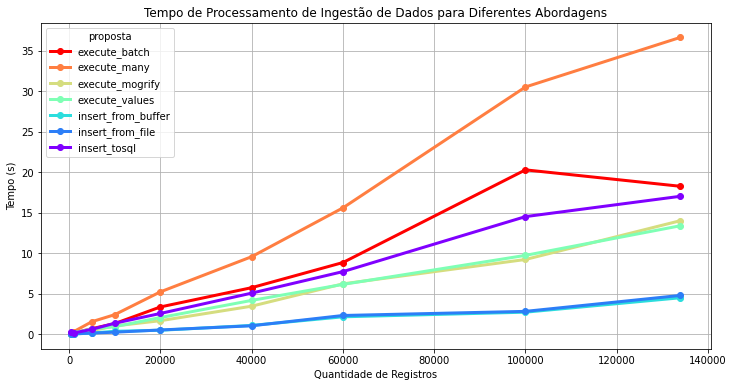

In [233]:
# Visualizando resultados
df_time_pvt = df_time.pivot(index='registros', columns='proposta', values='tempo(s)')
df_time_pvt.plot(figsize=(12, 6), grid=True, colormap='rainbow_r', marker='o', linewidth=3, 
                 title='Tempo de Processamento de Ingestão de Dados para Diferentes Abordagens', 
                 xlabel='Quantidade de Registros', ylabel='Tempo (s)')

Principal referência: https://naysan.ca/2020/05/09/pandas-to-postgresql-using-psycopg2-bulk-insert-performance-benchmark/

Assim, esta interessante jornada se encerra com uma análise completa sobre as diferentes formas de realizar ingestões em bancos de dados utilizando DataFrames do pandas como insumos. Com os dados obtidos, pode-se concluir que as duas formas mais eficientes, considerando os atributos da base de dados utilizada para os testes, são as inserções via arquivo e via buffer, sendo estas representadas pelas funções `insert_from_file` e `insert_from_buffer`, respectivamente.

Por outro lado, a metodologia que apresentou um maior tempo de processamento a medida que a quantidade de registros da base aumentava foi a inserção via o método `execute_many()`.